In [5]:
import pandas as pd,numpy as np,matplotlib.pyplot as plt,seaborn as sns,warnings
warnings.simplefilter(action='ignore')
%matplotlib inline

In [6]:
df=pd.read_csv("/content/drive/MyDrive/DAT3.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
abc=df.columns
print(abc)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [ ]:
df.shape

(545, 13)

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'parking'}>]], dtype=object)

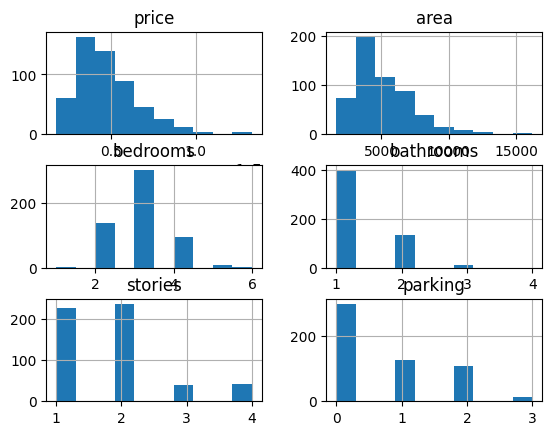

In [ ]:
df.hist()

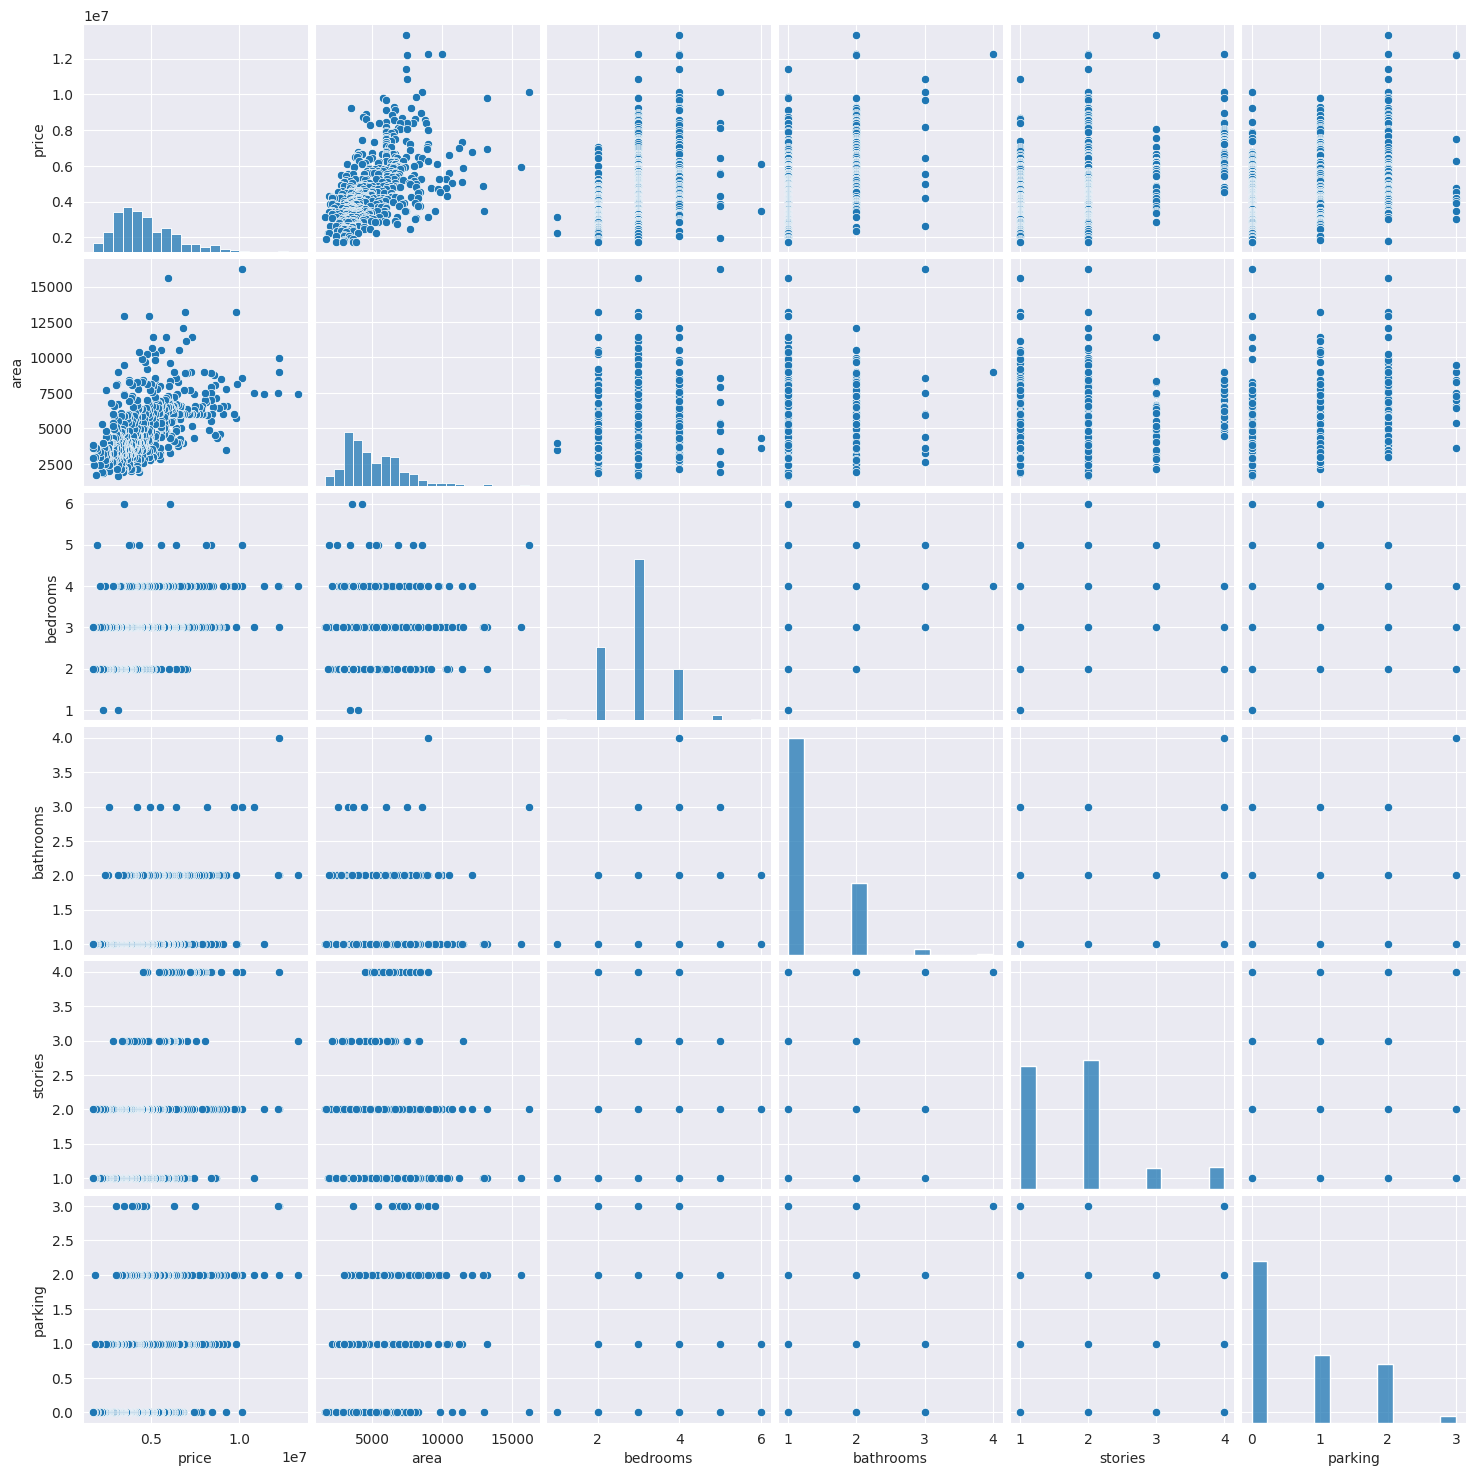

In [ ]:
sns.pairplot(df)
plt.show()

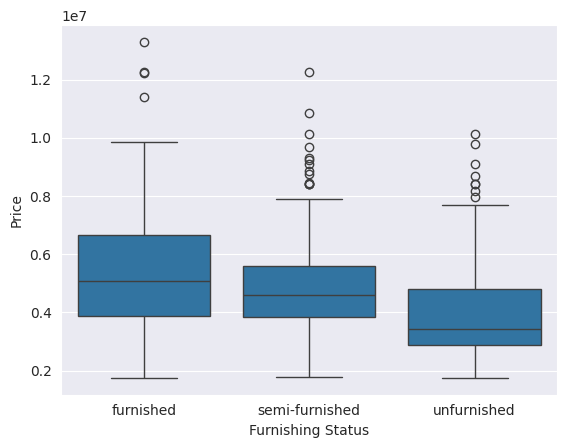

In [ ]:
sns.boxplot(x='furnishingstatus', y='price', data=df)
plt.xlabel('Furnishing Status')
plt.ylabel('Price')
plt.show()

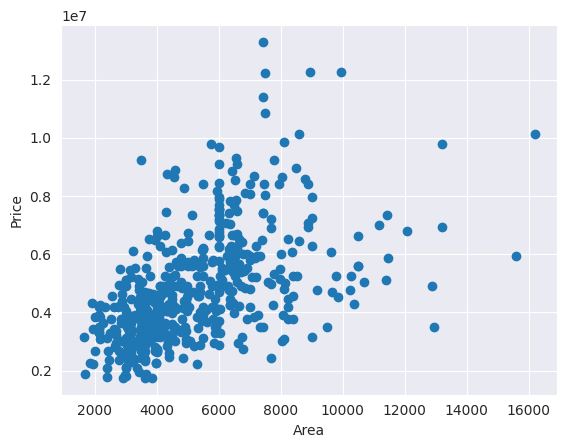

In [ ]:
plt.scatter(df['area'], df['price'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

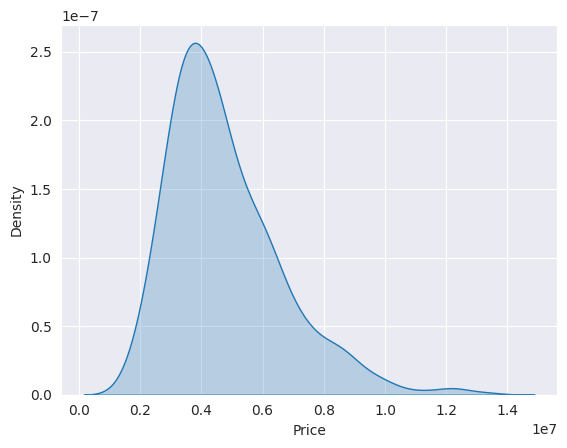

In [ ]:
sns.kdeplot(df['price'], shade=True)
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

In [7]:
def mapping(x):
  return x.map({'yes': 1, 'no': 0})


abc= ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[abc]=df[abc].apply(mapping)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [8]:
df['furnishingstatus']=df['furnishingstatus'].replace({"furnished":1,"semi-furnished":0.5,"unfurnished":0})
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.5
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1.0


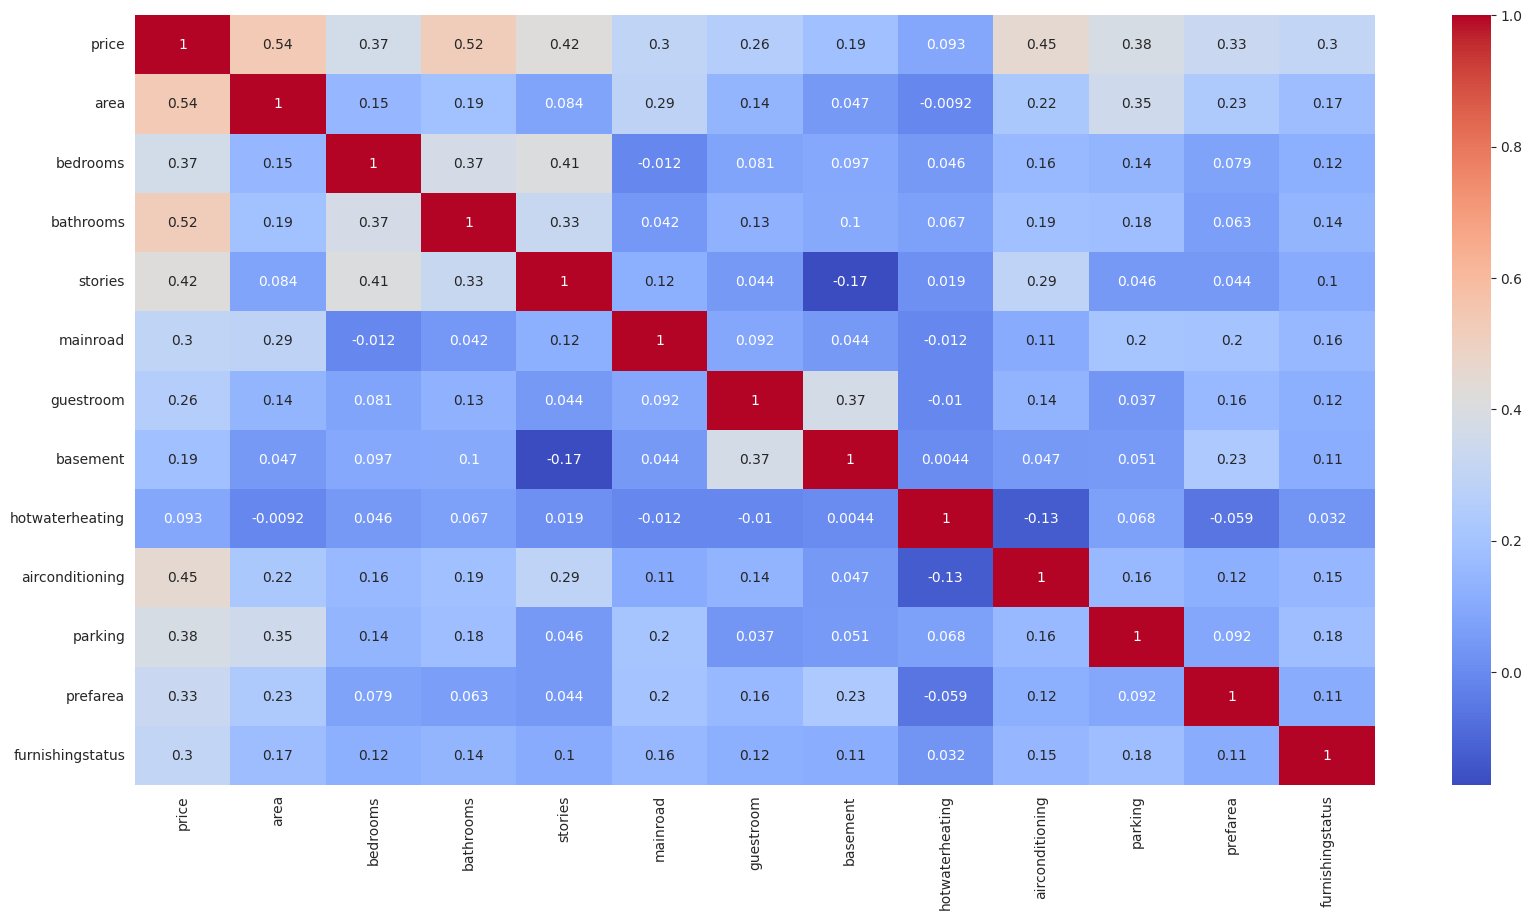

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm')
plt.show()

In [9]:
y=df['price']
X=df.drop(['price'],axis=1)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
print(f"x train{X_train.shape}\nx test{X_test.shape}\ny train{y_train.shape}\ny test{y_test.shape}")

x train(436, 12)
x test(109, 12)
y train(436,)
y test(109,)


In [10]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [15]:
predict=model.predict(X_test)
print(predict)

[6360332.81392052 6274841.29397204 6491465.71279757 5510686.58066066
 4181369.24106618 2885523.91550026 2763522.47558985 7412430.95457387
 2441833.46929013 4472027.70016119 3808056.09459758 3647311.37659292
 4719872.45260812 4789472.47550406 5311401.78577502 7983201.03395634
 4241829.19846894 3448263.28413122 6721648.44038589 2698618.85640317
 4541088.54032718 5223322.05546595 5259364.95493767 3435900.87088657
 5371454.25917624 7006772.64005917 2810208.40344603 7374586.0020844
 7656537.61737711 4414085.86734643 7604494.55854639 6648321.02410437
 5009078.9803121  4558375.25277219 6084943.51554084 4615889.23150495
 6542538.43513593 3405449.54581255 5012056.66858659 5734936.65551556
 3951160.04099086 3278997.08792198 3675598.29596798 4556073.9359985
 6376266.62881046 3353995.50234441 4759726.87102659 2709760.27833656
 2667485.0387272  3334652.27224928 4943104.31709951 4503221.10620144
 2663682.12060066 3154805.19351193 5012058.28154696 4296047.14364784
 3237973.09438201 4047698.21328072 3

In [ ]:
X_train.head(1)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
272,4075,3,1,1,1,1,1,0,0,2,0,0.5


In [12]:
from sklearn.metrics import mean_squared_error,r2_score
r2=model.score(X_test,y_test)
print(r2)

0.6183140939593395


In [16]:
y_test_matrix=y_test.values.reshape(-1,1)
new_df=pd.DataFrame({'actual': y_test_matrix.flatten(), 'predicted': predict.flatten()})

In [17]:
new_df.head()

,actual,predicted
0,7070000,6.360333e+06
1,4550000,6.274841e+06
2,5600000,6.491466e+06
3,6125000,5.510687e+06
4,2940000,4.181369e+06


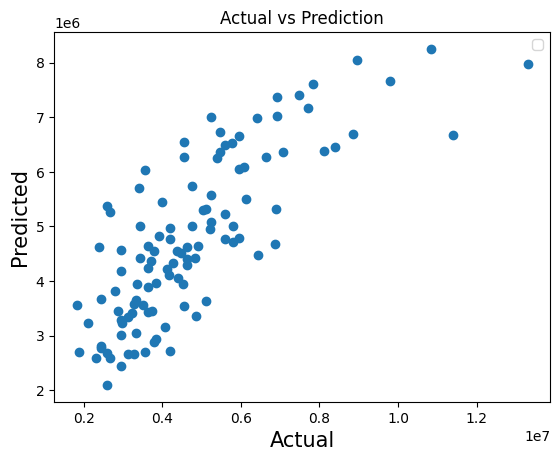

In [19]:

fig = plt.figure()

plt.scatter(y_test, predict)

plt.title('Actual vs Prediction')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.legend()
plt.show()

In [ ]:
import pickle as pk
pk.dump(model,open('house.sav','wb'))